# Initial Data Cleaning and EDA    

## Initial EDA

### Selecting colunmns of interest and target feature(s):

1) Which columns in your data sets will help you answer the questions posed by your problem statement?

A) There are several columns identified previously that will be relevant. All columns are related to housing policies at the state level, including private and public spending, discrimination laws, rent control, and housing prices. The housing names are identified under the variable "interesting_columns".

2) Which columns represent the key pieces of information you want to examine? 

A) The primary target variable that we want to examine is the rent control (regulation_rent_control) variable.

3) How many numerical, textual, datetime, columns in the dataset?

A) Although all columns are stored numerically, most of the columns encode categorical data stored in 0s or 1s. Column "st" is text, and column "year" is numerical but encodes datetime (only year) information. Columns "housing_prices_quar","ahcdpi","ahcdpia","ahcdspt","landfree", and "ig_cons" contain numerical data that is a continuous variable (numerical). 

4) Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process?

A) The "st" column will be our linking variable.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import pdb

In [38]:
interesting_columns = ['st','year','regulation_rent_control',
                       'frent','landfree','housing_prices_quar',
                       'ahcdpi','ahcdpia','ahcdspt','ig_cons',
                       'ndl_housing','fhpriv','fhpub','fhurb',
                       'race_boehmke_fhpub','w_race_fair_housing_private',
                       'pubhouen','regulation_housing_directstateai',
                       'regulation_housing_enabling_federal_aid']

df = pd.read_csv('datasets/State_public policy.csv',low_memory=False)
df.drop(df.columns.difference(interesting_columns),axis=1,inplace=True)


# Goals for Initial Data Cleaning
- Address NaNs, interpolate, drop, or fill?
- Rename columns to meaningful strings
- Classify the binary data as categorical

In [39]:
print(len(df)) #Report the total number of rows
df.isna().sum() #Report the total number of NaNs across all columns


6171


st                                            0
year                                          0
housing_prices_quar                        4284
ahcdpi                                     4121
ahcdpia                                    4121
ahcdspt                                    4121
landfree                                   5971
ig_cons                                    5880
ndl_housing                                6120
fhpriv                                     1271
fhpub                                      1271
fhurb                                      1271
race_boehmke_fhpub                         4815
w_race_fair_housing_private                5671
pubhouen                                   1271
frent                                      5321
regulation_housing_directstateai           5508
regulation_housing_enabling_federal_aid    5259
regulation_rent_control                    2921
dtype: int64

In [40]:
100* df.isna().sum() / len(df)

st                                          0.000000
year                                        0.000000
housing_prices_quar                        69.421488
ahcdpi                                     66.780100
ahcdpia                                    66.780100
ahcdspt                                    66.780100
landfree                                   96.759034
ig_cons                                    95.284395
ndl_housing                                99.173554
fhpriv                                     20.596338
fhpub                                      20.596338
fhurb                                      20.596338
race_boehmke_fhpub                         78.026252
w_race_fair_housing_private                91.897585
pubhouen                                   20.596338
frent                                      86.225895
regulation_housing_directstateai           89.256198
regulation_housing_enabling_federal_aid    85.221196
regulation_rent_control                    47.

We can see that several of the data points have a lot of NaNs, this is probably due to the limited time-data in which a lot of these were collected

In [41]:
df.dtypes

st                                          object
year                                         int64
housing_prices_quar                        float64
ahcdpi                                     float64
ahcdpia                                    float64
ahcdspt                                    float64
landfree                                   float64
ig_cons                                    float64
ndl_housing                                float64
fhpriv                                     float64
fhpub                                      float64
fhurb                                      float64
race_boehmke_fhpub                         float64
w_race_fair_housing_private                float64
pubhouen                                   float64
frent                                      float64
regulation_housing_directstateai           float64
regulation_housing_enabling_federal_aid    float64
regulation_rent_control                    float64
dtype: object

### Explore Individual columns for preliminary insigh

1) How many null values are present in your data?

A) The data has NaNs with some columns having as high as 99.2% NaNs. This is due to the dataset being stored for data starting  in 1900 up to 2020, while some of these columns have only been collected for 3 years. 

# Change columns to the appropriate types

In [42]:
#Reformat the columns to the appropriate type. Categorical, Float or Integer.
categorical_columns = ['frent',
                       'regulation_rent_control',
                       'fhurb',
                       'fhpriv',
                       'fhpub',
                       'ndl_housing',
                       'st',
                       'race_boehmke_fhpub',
                       'regulation_housing_enabling_federal_aid',
                       'regulation_housing_directstateai',
                      'w_race_fair_housing_private',
                      'pubhouen']

df[categorical_columns] = df[categorical_columns].astype('category')
df['year'] = pd.to_datetime(df['year'],format='%Y')
df.dtypes

st                                               category
year                                       datetime64[ns]
housing_prices_quar                               float64
ahcdpi                                            float64
ahcdpia                                           float64
ahcdspt                                           float64
landfree                                          float64
ig_cons                                           float64
ndl_housing                                      category
fhpriv                                           category
fhpub                                            category
fhurb                                            category
race_boehmke_fhpub                               category
w_race_fair_housing_private                      category
pubhouen                                         category
frent                                            category
regulation_housing_directstateai                 category
regulation_hou

# Change column names to a standarized method

In [43]:
## Rename the columns according to the name dictionary
name_dictionary = {'st':'State',
                   'year':'Year',
                   'housing_prices_quar':'Housing_Prices_Quarter',
                   'fhpub':'Public_Fair_Housing',
                   'fhpriv':'Private_Fair_Housing',
                   'fhurb':'Urban_Fair_Housing',
                   'frent':'Rent_Control',
                   'regulation_rent_control':'Prohibit_Rent_Control',
                   'ahcdspt':'Govt_Direct_Expenditure',
                   'ahcdpia':'Unexpected_Housing_Spending',
                   'ahcdpi':'Community_Spending',
                  'ig_cons':'Number_Interest_Groups',
                   'regulation_housing_directstateai':'State_Aid_Allowed',
                   'regulation_housing_enabling_federal_aid':'Federal_Aid_Allowed',
                  'w_race_fair_housing_private':'Banned_Discrimination_Private_Housing',
                  'race_boehmke_fhpub':'Banned_Discrimination_Public_Housing',
                  'landfree':'Property_Rights',
                  'pubhouen':'Legislation_Public_Housing',
                  'ndl_housing':'No_Discrimination_Laws',
                  }
df = df.rename(name_dictionary,axis=1)
df.head(5)

,State,Year,Housing_Prices_Quarter,Community_Spending,Unexpected_Housing_Spending,Govt_Direct_Expenditure,Property_Rights,Number_Interest_Groups,No_Discrimination_Laws,Private_Fair_Housing,Public_Fair_Housing,Urban_Fair_Housing,Banned_Discrimination_Public_Housing,Banned_Discrimination_Private_Housing,Legislation_Public_Housing,Rent_Control,State_Aid_Allowed,Federal_Aid_Allowed,Prohibit_Rent_Control
0,AK,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,1902-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,1903-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,1904-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ideas on how to deal with NaNs
For most categorical, we can fill in with the previous value until the category type changes. For example, Banned Discrimination Housing. When the value is 0 (no law banning discrimination), fill in 0's until we find the next 1 (a law banning discrimination), since we know that the law went from 0 -> 1 and we assume that it was always 0, unless 1. Once it's 1, then it's always 1.

For Housing Prices or Number of Interest Groups, we can interpolate per state across years. 

Unsure how to deal with the other float data, such as governement spending, and such

In [44]:
df.describe()

,Housing_Prices_Quarter,Community_Spending,Unexpected_Housing_Spending,Govt_Direct_Expenditure,Property_Rights,Number_Interest_Groups
count,1887.000000,2050.000000,2050.000000,2050.000000,200.000000,291.000000
mean,1.971235,0.002961,0.000757,463.645566,-0.000475,24.240550
std,1.130532,0.001859,0.001796,970.261225,0.058297,20.660904
min,0.437025,0.000000,-0.004202,0.000000,-0.181303,1.000000
25%,1.119725,0.001891,-0.000278,52.930750,-0.009172,11.500000
50%,1.700325,0.002668,0.000589,157.142500,0.015869,18.000000
75%,2.488200,0.003662,0.001574,442.672500,0.036232,32.000000
max,7.142125,0.033172,0.028520,10898.737000,0.054736,160.000000


<AxesSubplot:xlabel='Year'>

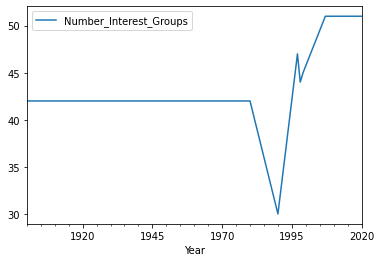

In [45]:
justMN = df.loc[df['State'] == 'MN',['Year','Number_Interest_Groups']]

justMN = justMN.set_index('Year')
justMN.interpolate(method='time',inplace=True)
justMN.interpolate(method='backfill',direction='backward',inplace=True)

justMN.reset_index(inplace = True)
justMN.rename({'index':'Year'},axis = 1, inplace = True)
justMN.plot(x='Year',y='Number_Interest_Groups')

The above is a quick test on interpolation for housing prices/ number of interest groups. The first data is collected in 1980, and so from then on we interpolate linearly across time depending on the available data. For this method of interpolation (method = time), we need the index to be a datetime object, so we have to set the index to the year. Once this has been done, we need to fill in the NaNs for data <1980, which we just set to the latest data (value at 1980). At the end, we reset the index and rename the column to year again.

In [46]:
def Fill_NaN_Linear(df,col_to_interpolate):
    df[col_to_interpolate] = df.groupby('State')[col_to_interpolate].transform(lambda group: group.interpolate(method='time'))
    df[col_to_interpolate] = df.groupby('State')[col_to_interpolate].transform(lambda group: group.interpolate(method='backfill'))
    
    return df

In [47]:
df = df.set_index('Year')
#Interpolate FORWARD in time with a linear relationship
#Interpolate BACKWARD in time with a padding method

#Transform returns a series with the same size as the original (df) and thus we can re-direct it to a column value of df2.
df = Fill_NaN_Linear(df,'Number_Interest_Groups')
df = Fill_NaN_Linear(df,'Housing_Prices_Quarter')
df = Fill_NaN_Linear(df,'Community_Spending')
df = Fill_NaN_Linear(df,'Unexpected_Housing_Spending')
df = Fill_NaN_Linear(df,'Govt_Direct_Expenditure')
df = Fill_NaN_Linear(df,'Property_Rights')

df.reset_index(inplace= True)
df.rename({'index':'Year'},axis= 1 , inplace =True)

<AxesSubplot:>

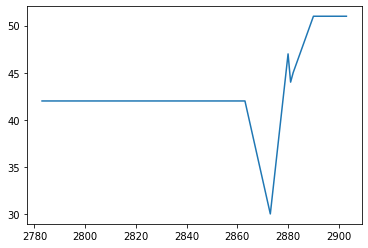

In [48]:
df[df['State'] == 'MN']['Number_Interest_Groups'].plot()

Verifying that the interpolation across the table returns the same as the interpolation across a single state (above). Matching graphs demonstrate that the interpolation performed as expected.

In [49]:
def Fill_NaN_Categorical(df,category_to_pad):
    df[category_to_pad] = df.groupby('State')[category_to_pad].transform(lambda group: group.interpolate(method='ffill'))
    df[category_to_pad] = df.groupby('State')[category_to_pad].transform(lambda group: group.interpolate(method='backfill'))
    
    return df

In [50]:
#Fill the categorical data by padding forward in time, then backwards in time
cat_cols = ['Private_Fair_Housing','No_Discrimination_Laws',
             'Public_Fair_Housing','Urban_Fair_Housing',
             'Banned_Discrimination_Public_Housing',
             'Banned_Discrimination_Private_Housing',
             'Legislation_Public_Housing','Rent_Control',
             'State_Aid_Allowed','Federal_Aid_Allowed','Prohibit_Rent_Control']

for cat in cat_cols:
    df = Fill_NaN_Categorical(df,cat)

# Assess which categories still contain NaN values

In [51]:
#Identify categorical columns that still contains NaNs
NaN_table = df.drop(['State','Year'],axis = 1).isna().groupby(df.State,sort=False).sum()

NaN_table = pd.melt(NaN_table,id_vars=None, value_vars=NaN_table.columns,ignore_index=False,var_name = 'Category_with_NaNs',value_name='Total_NaNs')
NaN_table[NaN_table['Total_NaNs'] > 0].sort_values('State')

,Category_with_NaNs,Total_NaNs
State,,
AK,Federal_Aid_Allowed,121
DC,Community_Spending,121
DC,Unexpected_Housing_Spending,121
DC,Govt_Direct_Expenditure,121
DC,Property_Rights,121
DC,Number_Interest_Groups,121
DC,Private_Fair_Housing,121
DC,Public_Fair_Housing,121
DC,Urban_Fair_Housing,121


Based on the table above, it appears that DC in general does not have much data, since for the majority of the categories all of them still remain NaN. I recommend dropping DC as a metric. Afterwards, we have to assess 3 more aspects. Arkansas for Federal Aid, Hawaii for Federal Aid, and Wyoming for Prohibit Rent Control.

In [52]:
df.drop(df[df['State'] == 'DC'].index,axis=0, inplace =True)

After talking with the team, we decided to drop Alaska and Hawaii regarding the federal aid allowed. Since we can't drop it, I will classify it as a separate category (2)

In [53]:
df['Prohibit_Rent_Control'] = df['Prohibit_Rent_Control'].cat.add_categories(10.0)
df['Prohibit_Rent_Control'].fillna(10,inplace = True)

In [54]:
df['Federal_Aid_Allowed'] = df['Federal_Aid_Allowed'].cat.add_categories(10.0)
df['Federal_Aid_Allowed'].fillna(10,inplace = True)

In [55]:
#Check for NaNs once last time
NaN_table = df.drop(['State','Year'],axis = 1).isna().groupby(df.State,sort=False).sum()

NaN_table = pd.melt(NaN_table,id_vars=None, value_vars=NaN_table.columns,ignore_index=False,var_name = 'Category_with_NaNs',value_name='Total_NaNs')
NaN_table[NaN_table['Total_NaNs'] > 0].sort_values('State')

,Category_with_NaNs,Total_NaNs
State,,


Compare the statistics after all the cleaning to ensure that the general trends still hold

In [56]:
df.describe()

,Housing_Prices_Quarter,Community_Spending,Unexpected_Housing_Spending,Govt_Direct_Expenditure,Property_Rights,Number_Interest_Groups
count,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000
mean,1.232796,0.001905,0.000304,217.676647,-0.001635,22.743043
std,1.062277,0.001762,0.001596,698.998689,0.057881,18.517639
min,0.437025,0.000000,-0.004202,0.000000,-0.181303,1.000000
25%,0.626625,0.000551,-0.000717,1.883000,-0.010240,12.000000
50%,0.681125,0.001649,-0.000127,15.070000,0.015869,18.000000
75%,1.455594,0.002778,0.001218,130.503625,0.035147,26.000000
max,7.142125,0.033172,0.028520,10898.737000,0.054736,160.000000


C:\Users\Gerardo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


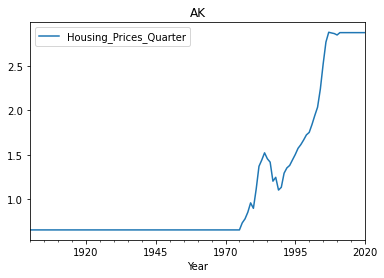

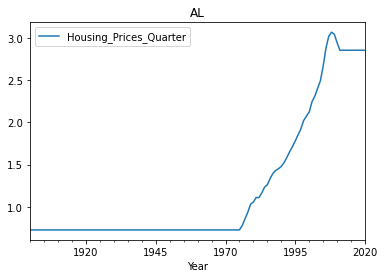

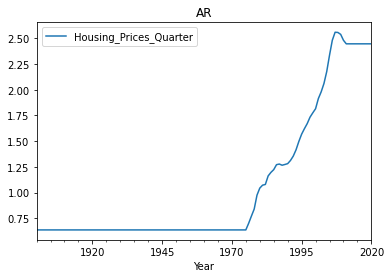

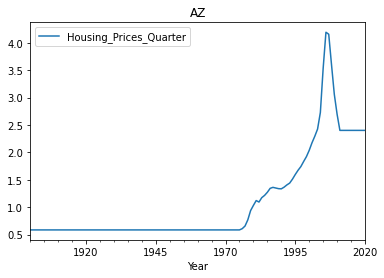

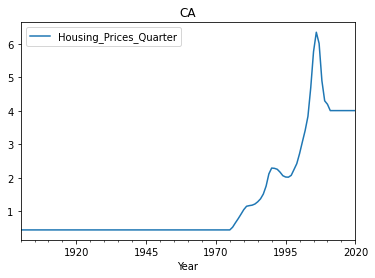

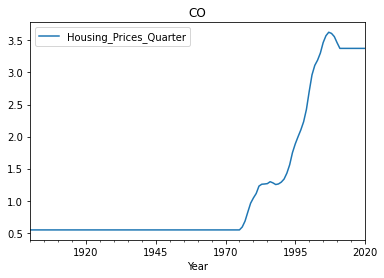

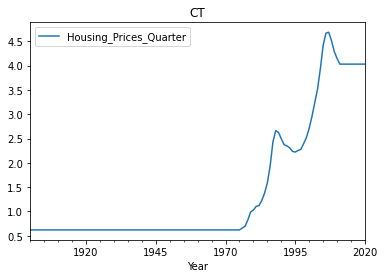

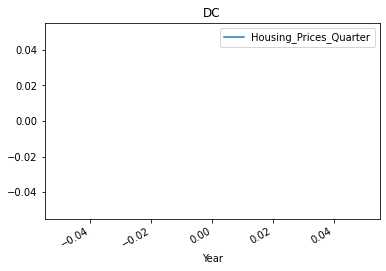

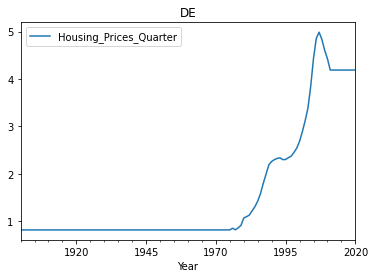

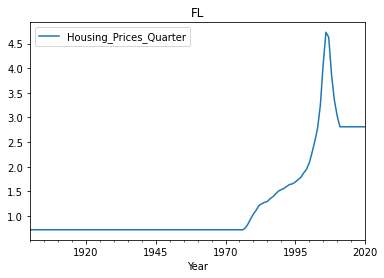

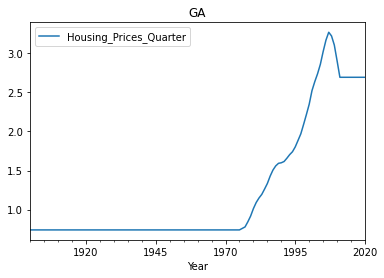

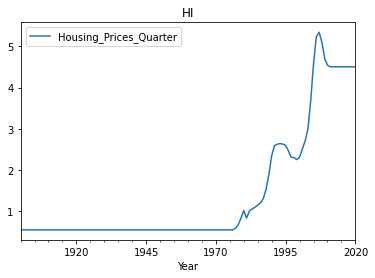

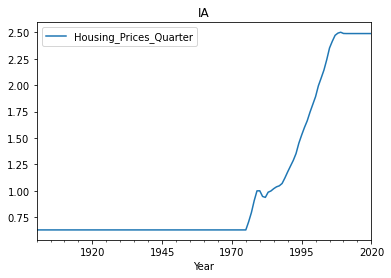

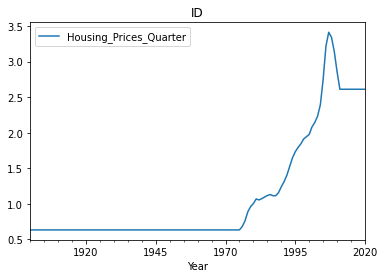

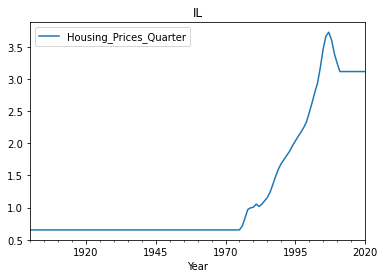

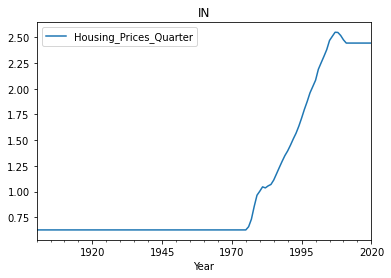

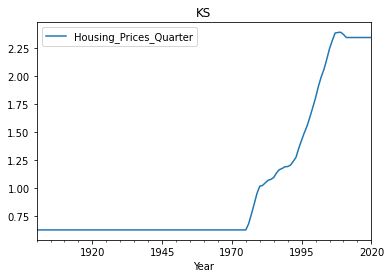

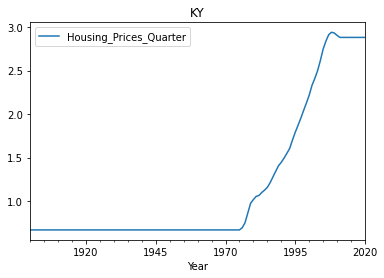

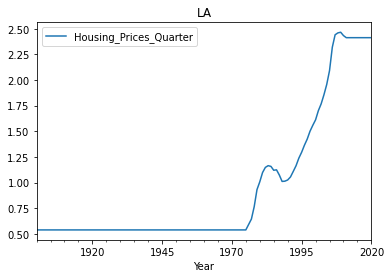

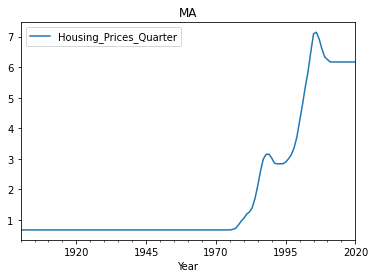

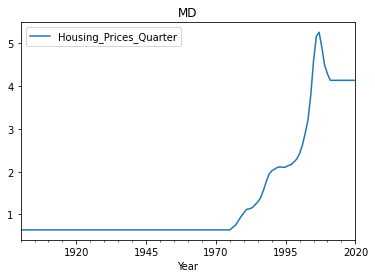

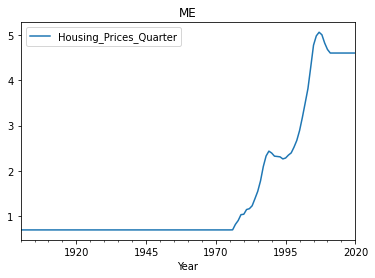

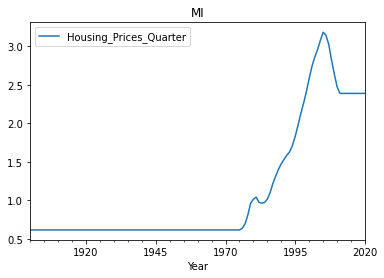

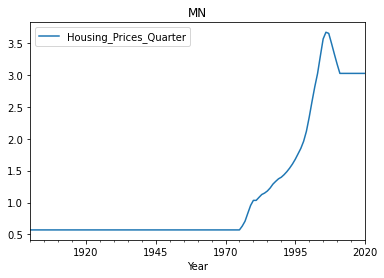

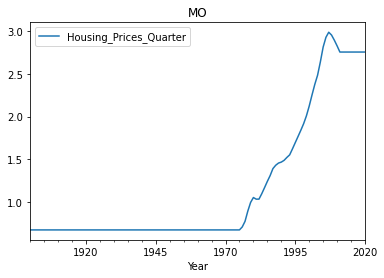

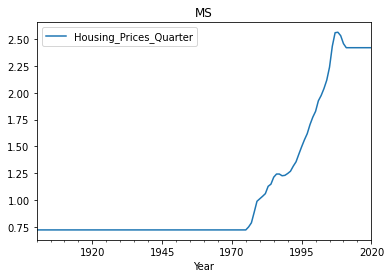

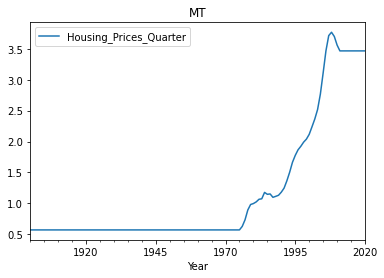

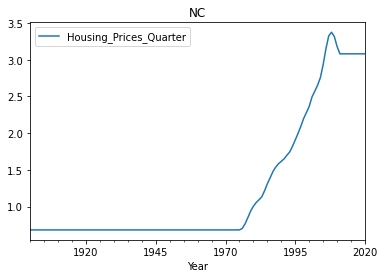

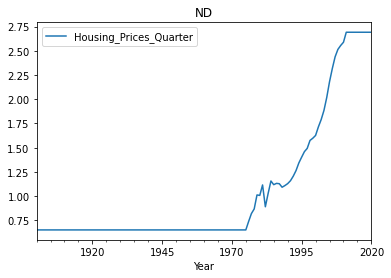

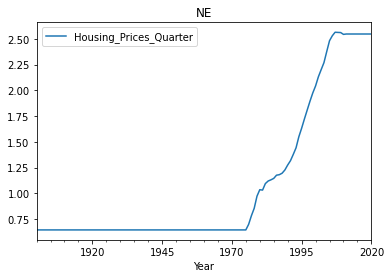

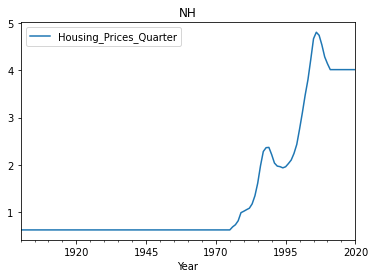

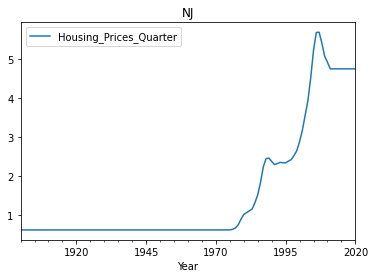

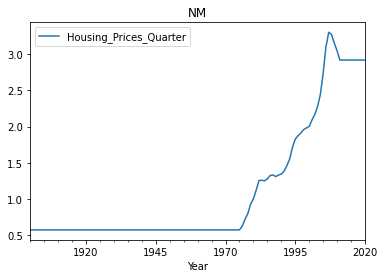

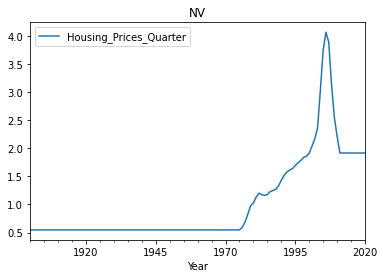

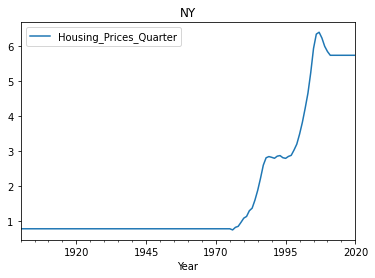

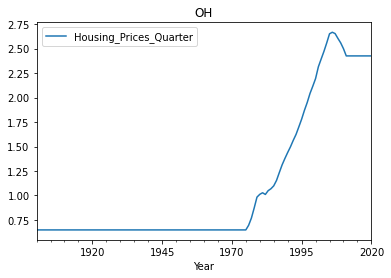

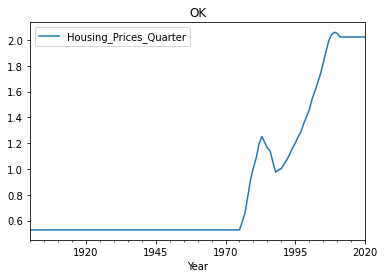

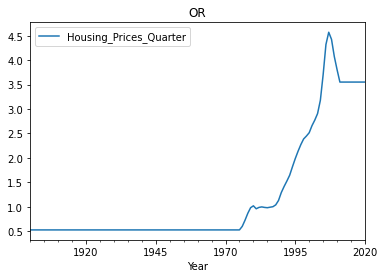

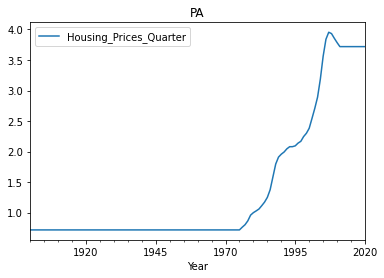

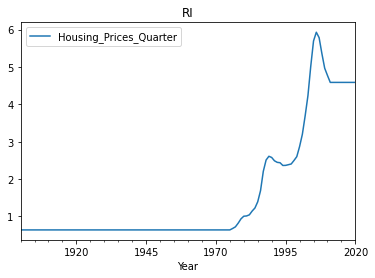

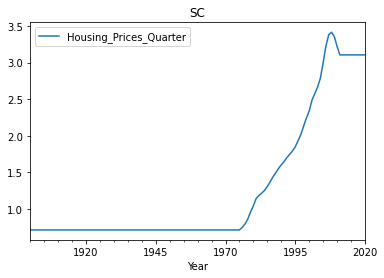

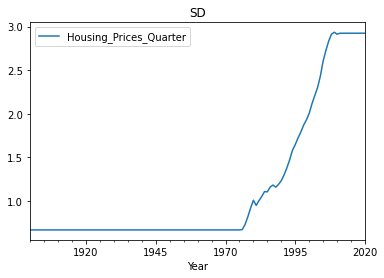

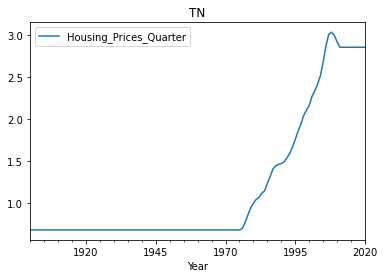

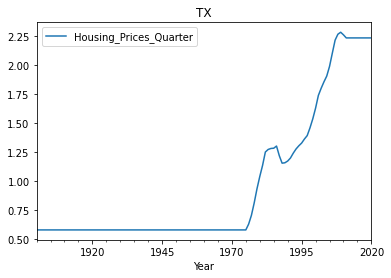

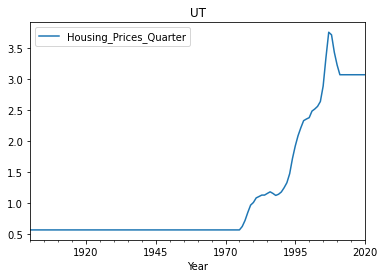

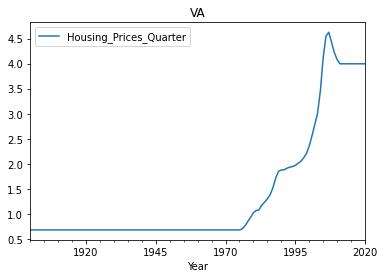

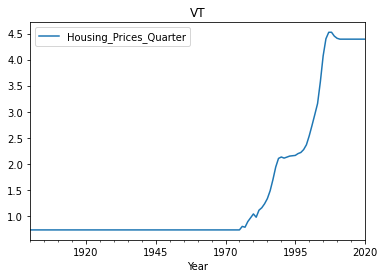

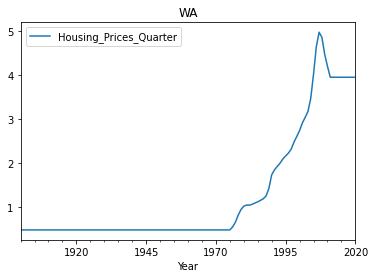

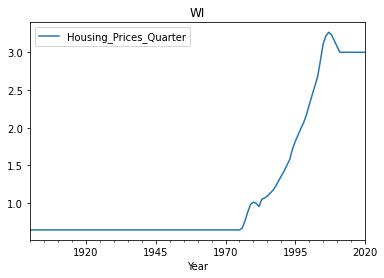

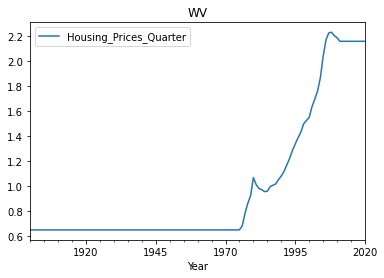

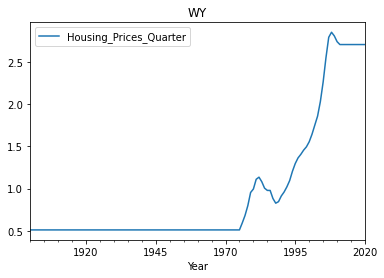

In [57]:
#for title, group in df.groupby('State'):
#    group.plot(x='Year',y ='Housing_Prices_Quarter', title=title)

In [58]:
def time_series_categorical_plot(df,category,group_cat='Year'):
    time_counts =  df.groupby(group_cat)[category].value_counts(normalize=True)
    
    _,ax = plt.subplots(figsize=(8,6))
    legends = ['without','with','']
    
    for cat in df[category].unique().sort_values(ascending=True):
        #pdb.set_trace()
        time_counts[:,cat].plot(ax=ax,title=category)
        
    ax.set_ylabel('Percentage of States with/without Policy'); 
    ax.legend(legends)

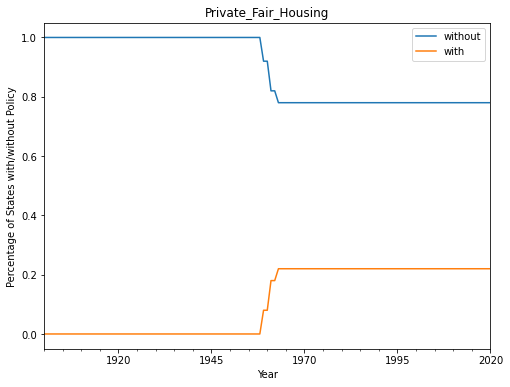

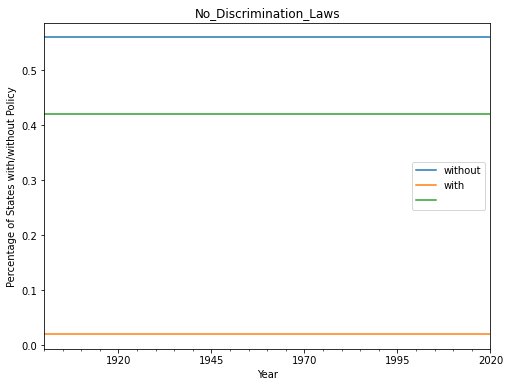

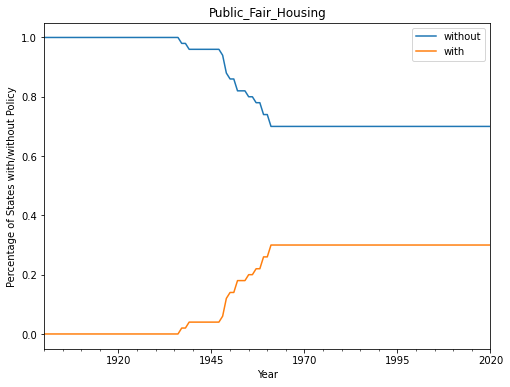

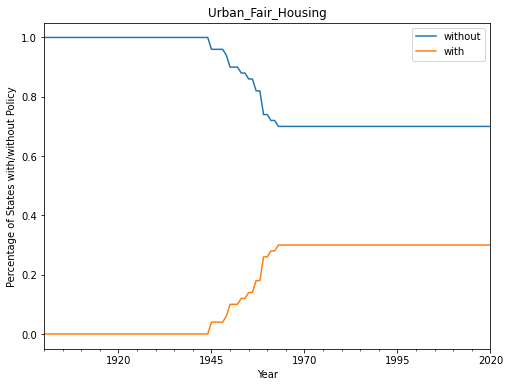

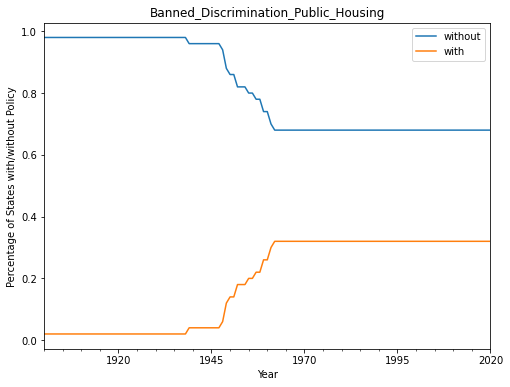

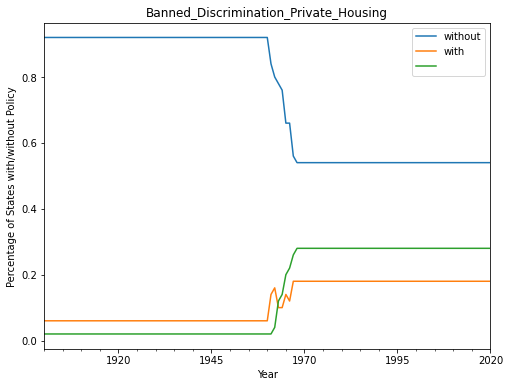

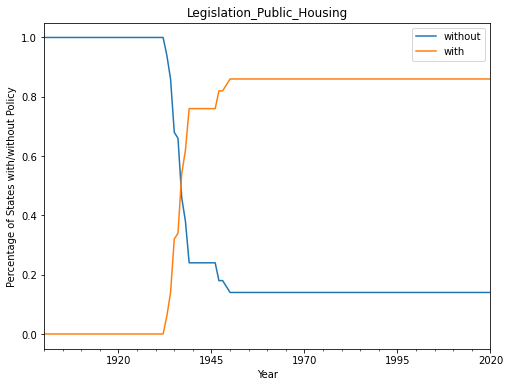

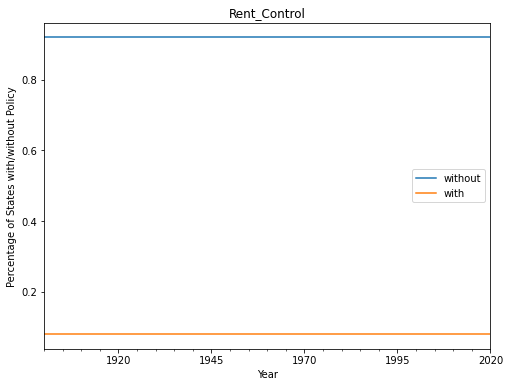

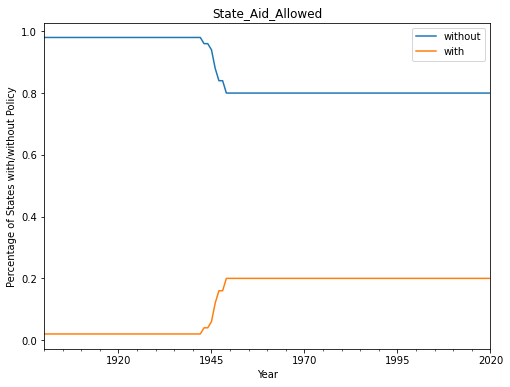

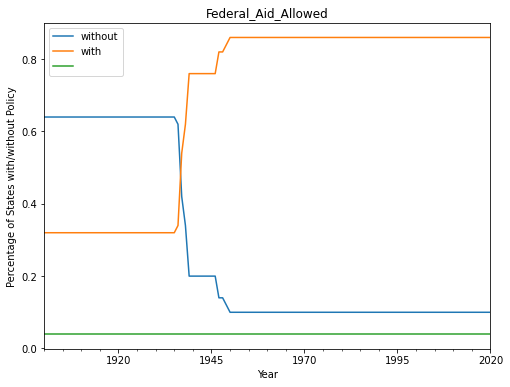

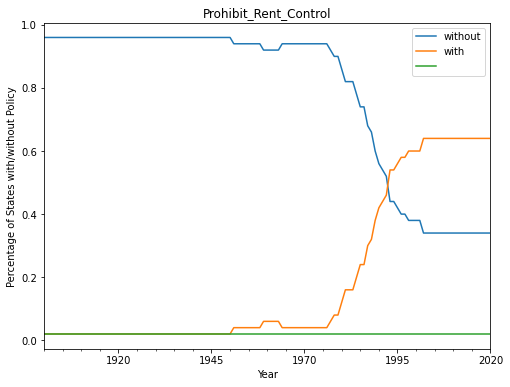

In [59]:
for cat in cat_cols:
    time_series_categorical_plot(df,cat)

### Rent Control

1) Rent control only existed in a few states and no state has changed its policy.

2) States that have implemented rent control (California, NY, NJ, MD) have had an increase in housing prices. The rate appears much higher for these states than others.

3) It appears we will have to explore the other variables to see if state intervention can aid in the housing prices. 

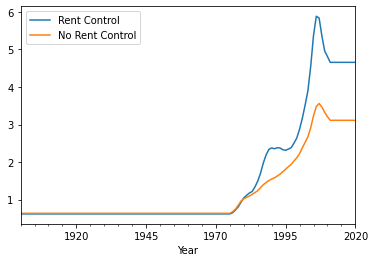

In [60]:
fig,ax = plt.subplots(nrows=1,ncols=1)
df[df['Rent_Control'] == 1.0].groupby('Year').mean().plot(y = 'Housing_Prices_Quarter',ax = ax)
df[df['Rent_Control'] == 0.0].groupby('Year').mean().plot(y = 'Housing_Prices_Quarter',ax = ax)
plt.legend(['Rent Control','No Rent Control'])

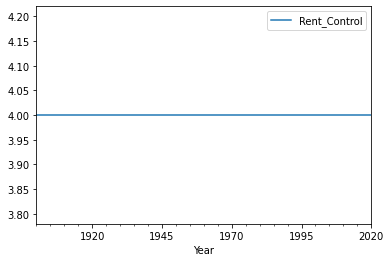

In [61]:
cat= 'Rent_Control'

df[cat] = df[cat].astype(float)
sms = df.groupby('Year').sum().plot(y = cat)
df[cat] = df[cat].astype('category')

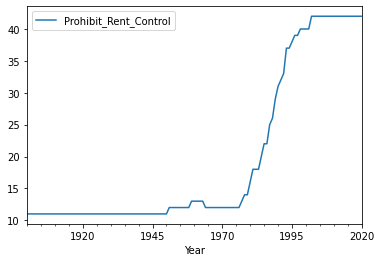

In [62]:
cat= 'Prohibit_Rent_Control'

df[cat] = df[cat].astype(float)
sms = df.groupby('Year').sum().plot(y = cat)
df[cat] = df[cat].astype('category')

In [63]:
df[df['Rent_Control'] == 1.0]['State'].unique()

['CA', 'MD', 'NJ', 'NY']
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [64]:
df.to_csv('cleaned_public_policy.csv',index = False)

Interestingly the number of interest group almost linearly correlates with increased housing prices.

<AxesSubplot:xlabel='Number_Interest_Groups', ylabel='Housing_Prices_Quarter'>

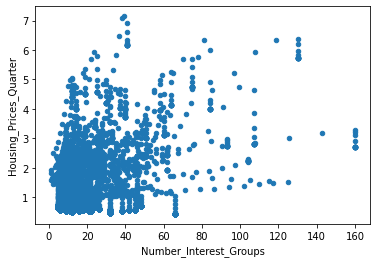

In [65]:
df.plot.scatter(x='Number_Interest_Groups',y = 'Housing_Prices_Quarter')

In [66]:
#for name,gp in df.groupby('State'):
   # gp.plot.scatter(x = 'Number_Interest_Groups',y = 'Housing_Prices_Quarter',title=name)